<a href="https://colab.research.google.com/github/rallyfranky/my-first-repo/blob/main/opt_recomend_item2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://signate.jp/competitions/268/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_A = pd.read_table('/content/drive/MyDrive/signate/opt_recomend/train_A.tsv')
df_B = pd.read_table('/content/drive/MyDrive/signate/opt_recomend/train_B.tsv')
df_C = pd.read_table('/content/drive/MyDrive/signate/opt_recomend/train_C.tsv')
df_D = pd.read_table('/content/drive/MyDrive/signate/opt_recomend/train_D.tsv')

In [3]:
df = pd.concat([df_A,df_B,df_C,df_C])

In [4]:
df.head()

,user_id,product_id,event_type,ad,time_stamp
0,0000000_A,00009250_a,1,-1,2017-04-08 12:09:04.629
1,0000000_A,00009250_a,1,-1,2017-04-27 12:55:57.783
2,0000000_A,00014068_a,1,-1,2017-04-08 11:57:53.746
3,0000000_A,00001254_a,1,-1,2017-04-08 12:04:26.008
4,0000000_A,00003316_a,1,-1,2017-04-08 12:05:31.326


In [5]:
import datetime
df.time_stamp = pd.to_datetime(df.time_stamp)
df.head()

,user_id,product_id,event_type,ad,time_stamp
0,0000000_A,00009250_a,1,-1,2017-04-08 12:09:04.629
1,0000000_A,00009250_a,1,-1,2017-04-27 12:55:57.783
2,0000000_A,00014068_a,1,-1,2017-04-08 11:57:53.746
3,0000000_A,00001254_a,1,-1,2017-04-08 12:04:26.008
4,0000000_A,00003316_a,1,-1,2017-04-08 12:05:31.326


In [6]:
span = []
for i, data in df.groupby('user_id'):
  span.append((data.time_stamp.max()-data.time_stamp.min()).days)

(array([40944.,  4566.,  3588.,  3316.,  2965.,  2753.,  2895.,  3075.,
         2677.,  2407.,  2322.,  2187.,  2248.,  2490.,  2717.,  2525.,
         2402.,  2494.,  2338.,  2292.,  2904.,  3399.,  3226.,  3452.,
         3866.,  3399.,  3188.,  3515.,  3447.,  2175.]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <a list of 30 Patch objects>)

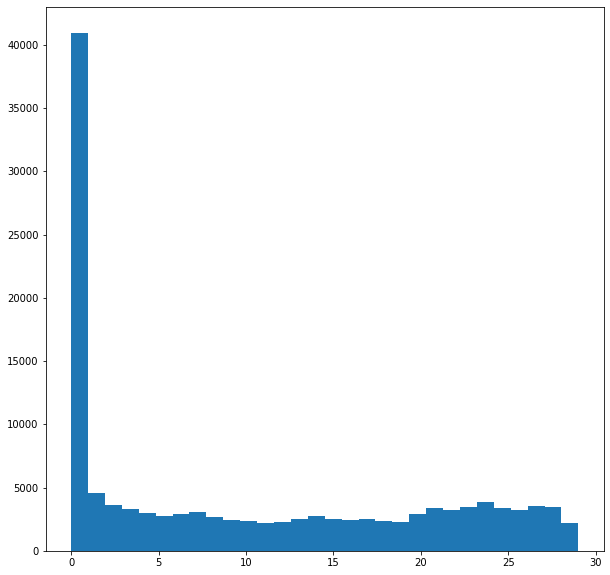

In [7]:
plt.figure(figsize=(10,10))
plt.hist(span,bins=30)

In [9]:
df['rank'] = df.groupby('user_id')['time_stamp'].rank(ascending=False, method='first')

In [10]:
df.head()

,user_id,product_id,event_type,ad,time_stamp,rank
0,0000000_A,00009250_a,1,-1,2017-04-08 12:09:04.629,12.0
1,0000000_A,00009250_a,1,-1,2017-04-27 12:55:57.783,10.0
2,0000000_A,00014068_a,1,-1,2017-04-08 11:57:53.746,15.0
3,0000000_A,00001254_a,1,-1,2017-04-08 12:04:26.008,14.0
4,0000000_A,00003316_a,1,-1,2017-04-08 12:05:31.326,13.0


In [22]:
train = df[df['rank']<10]

(array([1.603930e+06, 1.196232e+06, 9.304630e+05, 6.086010e+05,
        4.556890e+05, 3.810050e+05, 2.800320e+05, 2.303180e+05,
        2.068500e+05, 1.604250e+05, 1.382450e+05, 1.288900e+05,
        1.036930e+05, 9.149400e+04, 8.768300e+04, 7.228300e+04,
        6.503600e+04, 6.337800e+04, 5.303900e+04, 4.858900e+04,
        4.798300e+04, 4.047700e+04, 3.729900e+04, 3.727500e+04,
        3.190200e+04, 2.965000e+04, 2.980900e+04, 2.588600e+04,
        2.418200e+04, 2.438400e+04, 2.120500e+04, 1.987700e+04,
        2.021600e+04, 1.757600e+04, 1.658100e+04, 1.696700e+04,
        1.479400e+04, 1.400200e+04, 1.440300e+04, 1.260500e+04,
        1.192300e+04, 1.223100e+04, 1.078900e+04, 1.033900e+04,
        1.068000e+04, 9.378000e+03, 9.002000e+03, 9.333000e+03,
        8.277000e+03, 7.880000e+03, 8.195000e+03, 7.268000e+03,
        6.984000e+03, 7.265000e+03, 6.492000e+03, 6.288000e+03,
        6.635000e+03, 5.892000e+03, 5.702000e+03, 5.901000e+03,
        5.234000e+03, 5.067000e+03, 5.24

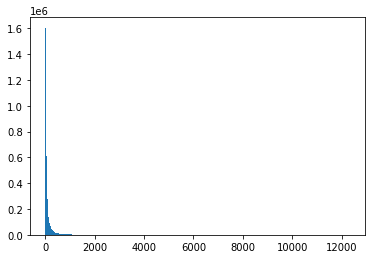

In [21]:
plt.hist(df['rank'],bins=1000)

In [23]:
item2vec_data = []

for user_id, data in train.groupby('user_id'):
  item2vec_data.append(data.sort_values('time_stamp')['product_id'].tolist())

In [24]:
item2vec_data

[['00008263_a',
  '00008525_a',
  '00009753_a',
  '00004433_a',
  '00009753_a',
  '00012725_a',
  '00003524_a',
  '00013303_a',
  '00004433_a'],
 ['00015686_b',
  '00015686_b',
  '00015686_b',
  '00001472_b',
  '00001472_b',
  '00008327_b',
  '00008327_b',
  '00015298_b',
  '00015686_b'],
 ['00003661_c',
  '00205242_c',
  '00205242_c',
  '00294192_c',
  '00294192_c',
  '00190500_c',
  '00190500_c',
  '00311374_c',
  '00311374_c'],
 ['00002087_a',
  '00003520_a',
  '00008379_a',
  '00008379_a',
  '00010169_a',
  '00000099_a',
  '00012734_a',
  '00003520_a',
  '00000099_a'],
 ['00005998_b',
  '00005998_b',
  '00005112_b',
  '00005112_b',
  '00005112_b',
  '00005112_b',
  '00005112_b',
  '00005112_b',
  '00005112_b'],
 ['00132474_c',
  '00260225_c',
  '00260225_c',
  '00204560_c',
  '00204560_c',
  '00204560_c',
  '00204560_c',
  '00204560_c',
  '00204560_c'],
 ['00008763_a',
  '00008763_a',
  '00008763_a',
  '00008763_a',
  '00004638_a',
  '00008763_a',
  '00008763_a',
  '00008763_a',
  

In [25]:
!pip install gensim==4.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# 因子数
factors = 100
# エポック数
n_epochs = 30
# windowサイズ
window = 100
# スキップグラム
use_skip_gram = 1
# 階層的ソフトマックス
use_hierarchial_softmax = 0
# 使用する単語の出現回数のしきい値
min_count = 5

In [26]:
import gensim

model = gensim.models.word2vec.Word2Vec(
    item2vec_data,
    vector_size=factors,
    window=window,
    sg=use_skip_gram,
    hs=use_hierarchial_softmax,
    epochs=n_epochs,
    min_count=min_count,
)

In [29]:
pred_user2items = dict()
for user_id, data in train.groupby("user_id"):
    input_data = []
    for item_id in data.sort_values("time_stamp")["product_id"].tolist():
        if item_id in model.wv.key_to_index:
            input_data.append(item_id)
    if len(input_data) == 0:
        # おすすめ計算できない場合は空配列
        pred_user2items[user_id] = []
        continue
    recommended_items = model.wv.most_similar(input_data, topn=10)
    pred_user2items[user_id] = [d[0] for d in recommended_items]

pred_user2items

{'0000000_A': ['00003553_a',
  '00007315_a',
  '00004977_a',
  '00006554_a',
  '00008359_a',
  '00011250_a',
  '00013715_a',
  '00006908_a',
  '00004805_a',
  '00005298_a'],
 '0000000_B': ['00006071_b',
  '00012898_b',
  '00007637_b',
  '00015763_b',
  '00009776_b',
  '00002293_b',
  '00004174_b',
  '00000554_b',
  '00009452_b',
  '00008900_b'],
 '0000000_C': ['00049596_c',
  '00166522_c',
  '00100032_c',
  '00248209_c',
  '00025393_c',
  '00126087_c',
  '00270071_c',
  '00139845_c',
  '00208406_c',
  '00140512_c'],
 '0000001_A': ['00005769_a',
  '00007161_a',
  '00007829_a',
  '00011898_a',
  '00005774_a',
  '00000443_a',
  '00013771_a',
  '00002520_a',
  '00011605_a',
  '00011450_a'],
 '0000001_B': ['00016206_b',
  '00005471_b',
  '00007379_b',
  '00016362_b',
  '00009275_b',
  '00005255_b',
  '00002113_b',
  '00006557_b',
  '00005243_b',
  '00012880_b'],
 '0000001_C': ['00312508_c',
  '00119562_c',
  '00150296_c',
  '00167560_c',
  '00137403_c',
  '00112954_c',
  '00213861_c',
  '00